In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

daten = pd.read_csv('../../PyCharm/daten4.csv')
features = daten.drop(columns=['genre'])
labels = daten['genre']

#Daten normalisieren:
scaler = MinMaxScaler() 
scaler.fit(features) #scaler an die Daten anpassen (damit z.B. max und min bestimmt wird)
features_n = scaler.transform(features) # Daten mit den vorher festgelegten/bestimmten Werte (min/max) normalisieren.

#Datensatz trennen
X_train, X_test, Y_train, Y_test = train_test_split(features_n,labels,test_size=0.2,shuffle = True, random_state=27)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
0.71 accuracy with a standard deviation of 0.06


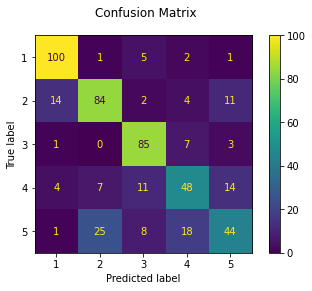

In [10]:
from sklearn import svm
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFECV
import numpy as np

clf = svm.LinearSVC()

rfe = RFECV(clf, step=1, cv=5)
selector = rfe.fit(X_train, Y_train)

features_index= np.where(selector.support_== False)[0] #der Index der Features, die den Status "True" haben --> ausgewählt wurden

print(selector.support_)
print(selector.ranking_)

features_test = np.delete(X_test, features_index, axis=1)
features_train = np.delete(X_train, features_index, axis=1)


clf.fit(features_train, Y_train)

#Cross-Validation
from sklearn.model_selection import cross_val_score
ergebnis = cross_val_score(clf, features_test, Y_test, cv=12)
print("%0.2f accuracy with a standard deviation of %0.2f" % (ergebnis.mean(), ergebnis.std()))

#Confusion Matrix darstellen
disp = metrics.plot_confusion_matrix(clf, features_test, Y_test)
disp.figure_.suptitle("Confusion Matrix")
plt.show()


[ True  True False  True  True  True  True  True False  True  True  True
 False  True  True  True  True  True False  True]
[1 1 3 1 1 1 1 1 4 1 1 1 2 1 1 1 1 1 5 1]
0.69 accuracy with a standard deviation of 0.05


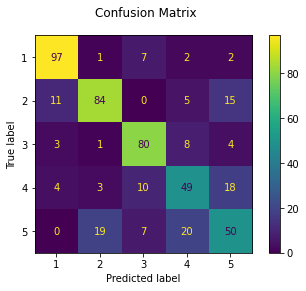

In [11]:
from sklearn.ensemble import RandomForestClassifier


clf = RandomForestClassifier(n_estimators=10)

rfe = RFECV(clf, step=1, cv=5)
selector = rfe.fit(X_train, Y_train)

features_index= np.where(selector.support_== False)[0] #der Index der Features, die den Status "True" haben --> ausgewählt wurden

print(selector.support_)
print(selector.ranking_)

features_test = np.delete(X_test, features_index, axis=1)
features_train = np.delete(X_train, features_index, axis=1)


clf.fit(features_train, Y_train)

#Cross-Validation
from sklearn.model_selection import cross_val_score
ergebnis = cross_val_score(clf, features_test, Y_test, cv=12)
print("%0.2f accuracy with a standard deviation of %0.2f" % (ergebnis.mean(), ergebnis.std()))

#Confusion Matrix darstellen
disp = metrics.plot_confusion_matrix(clf, features_test, Y_test)
disp.figure_.suptitle("Confusion Matrix")
plt.show()


[ True  True  True  True  True  True  True  True  True  True  True False
 False  True  True  True  True  True  True  True]
[1 1 1 1 1 1 1 1 1 1 1 2 3 1 1 1 1 1 1 1]
0.71 accuracy with a standard deviation of 0.05


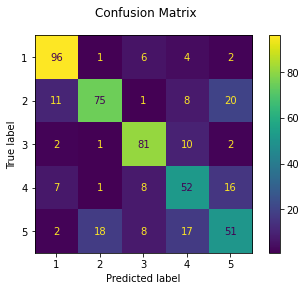

In [14]:
from sklearn.linear_model import LogisticRegression


clf = LogisticRegression(random_state=0, max_iter=5000) #max_iter musste ich festlegen, damit eine fehlermeludng nicht kommt --> erklärung dazu auf sklearn seite

rfe = RFECV(clf, step=1, cv=5)
selector = rfe.fit(X_train, Y_train)

features_index= np.where(selector.support_== False)[0] #der Index der Features, die den Status "True" haben --> ausgewählt wurden

print(selector.support_)
print(selector.ranking_)

features_test = np.delete(X_test, features_index, axis=1)
features_train = np.delete(X_train, features_index, axis=1)


clf.fit(features_train, Y_train)

#Cross-Validation
from sklearn.model_selection import cross_val_score
ergebnis = cross_val_score(clf, features_test, Y_test, cv=12)
print("%0.2f accuracy with a standard deviation of %0.2f" % (ergebnis.mean(), ergebnis.std()))

#Confusion Matrix darstellen
disp = metrics.plot_confusion_matrix(clf, features_test, Y_test)
disp.figure_.suptitle("Confusion Matrix")
plt.show()
